# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

## 1. Limpieza de instancias


### <font color='#3d59c6'>  1.1 CARGA DE PACKAGES </font>

In [497]:
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)
library(hunspell)

### <font color='#3d59c6'>  1.2 CARGA Y COMPRENSIÓN DE DATOS </font>

In [498]:
data_subject = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.')
head(data_subject)
tail(data_subject)

package_name,review,polarity
com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


In [499]:
str(data_subject)

'data.frame':	891 obs. of  3 variables:
 $ package_name: Factor w/ 23 levels "com.Slack","com.android.chrome",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ review      : Factor w/ 891 levels "  a avid fan of wapp; thats what we call it..  a recommendation.. if u guys can include a feature in which i ca"| __truncated__,..: 654 557 658 743 368 471 546 826 112 651 ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


Para el siguiente dataset, contamos con 891 observaciones, y tan solo 3 variables. Vamos a explorar nuestra variable objetivo:

In [500]:
round(prop.table(table(data_subject$polarity))*100, digits = 1)
round(prop.table(table(data_subject$package_name))*100, digits = 1)


   0    1 
65.5 34.5 


                 com.Slack         com.android.chrome 
                       4.5                        4.4 
       com.dropbox.android               com.evernote 
                       4.5                        4.5 
       com.facebook.katana          com.facebook.orca 
                       4.5                        4.5 
   com.google.android.talk          com.hamrokeyboard 
                       4.4                        4.4 
            com.hamropatro      com.imangi.templerun2 
                       4.3                        4.5 
   com.king.candycrushsaga       com.linkedin.android 
                       4.5                        4.5 
     com.opera.mini.native       com.rovio.angrybirds 
                       4.5                        4.4 
   com.shirantech.kantipur com.supercell.clashofclans 
                       4.0                        4.5 
            com.tencent.mm        com.twitter.android 
                       4.4                        4.4 
         

Vemos un claro desbalance de instancias por tipo de clase en polarity. Más adelante vamos a comentar las implicaciones que puede tener para el modelo clasificador de Naive Bayes. Por lo que hace a tipos de apps presentes, simplemente destacar que la última sigue una nomenclatura algo extraña (jabanaki.todo.todoly), sumado a que tenemos pocas reviews de dicha app (2.7% del total)

A partir de aquí, vamos a transformar nuestras reviews en un formato apto para hacer la predicción, además de hacer una limpieza para quedarnos con los tokens mas representativos, es decir, que mejor nos permitan identficar las distintas polarities

In [501]:
data_subject$polarity = factor(data_subject$polarity)

In [502]:
data_corpus = VCorpus(VectorSource(data_subject$review),readerControl = list(language = 'en'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


En este caso, hemos hecho directamente la función que nos permita filtrar el corpus generado:

In [503]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
removeSpecialCharacters <- function(x) {
  x <- gsub("\\\\u[[:xdigit:]]{4}", "", x)
  x <- gsub("[^[:alnum:][:space:]]", "", x)
  return(x)
}
removeEmojis <- function(x) gsub("[^\x01-\x7F]", "", x, perl = TRUE)


clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c(stopwords('english'),'google', 'candy', 'crush', 'clash', 'clans','linkedin', 'whatsapp', 'dropbox'))
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
               data_corpus_clean = tm_map(data_corpus_clean, removeSpecialCharacters)
               data_corpus_clean = tm_map(data_corpus_clean, removeEmojis)
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}

Comparado con el ejemplo dado, en este caso las reviews están en inglés, por lo que el lenguage se debe cambiar en consecuencia. Además, gracias a la revisión de los textos, se ha visto la presencia de carácteres especiales (intuiendo que son emojis o algun formato no identificable), los cuales se han eliminado para no introducir ruido al modelo.

También comentar que se han decidido eliminar palabras que son muy probables que se repitan, pero que no ayudan a distinguir entre clases. De entre estas, destacar los nombres de las apps (se han ido probando todos los nombres y esta es la combinación que ha acabado dando mayor accuracy).

In [504]:
data_corpus_clean = clean_corpus(data_corpus) 

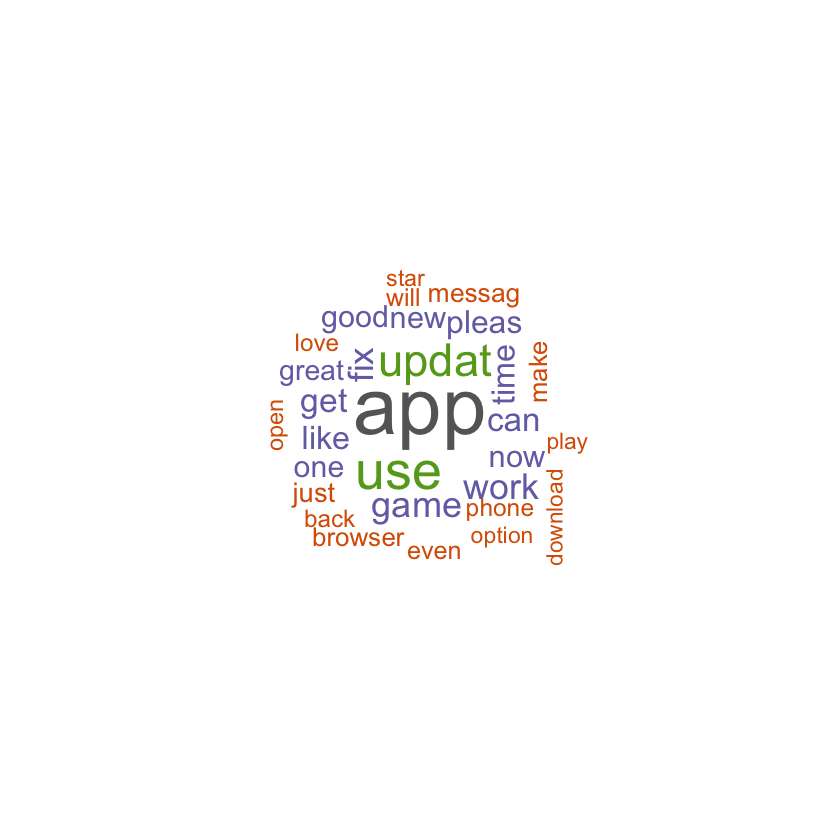

In [505]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

In [506]:
dtm = DocumentTermMatrix(data_corpus_clean)

In [507]:
str(dtm)

List of 6
 $ i       : int [1:16456] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:16456] 127 251 351 358 399 737 788 833 1251 1313 ...
 $ v       : num [1:16456] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 891
 $ ncol    : int 2738
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2738] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [508]:
termFreq = colSums(as.matrix(dtm))
head(termFreq)

aafnaii   aakhirat   aalikati        aap aapsssssss       aaru 
         1          1          1          4          1          1

In [509]:
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
aafnaii,aafnaii,1
aakhirat,aakhirat,1
aalikati,aalikati,1
aap,aap,4
aapsssssss,aapsssssss,1
aaru,aaru,1


In [510]:
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
app,app,480
use,use,300
updat,updat,244
game,game,179
work,work,177
fix,fix,171


Vemos como la palabra app (que a priori no es indicativo de si la review es buena/mala o neutra) es de las palabras mas usadas por los usuarios. La que mas nos podria interesar es la de update, ya que podemos intuir que los users estan o bien pidiendo una actualización de la app o estan elogiando esta. También podemos destacar la palabra fix, en la que prácticamente seguro que estará mas relacionada con la clase buena/mala review.

In [511]:
set.seed(555)

inTrain <- createDataPartition(y = data_subject$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
data.train<-data_subject[inTrain,]
data.test<-data_subject[-inTrain,]

In [512]:
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

In [513]:
freq_terms = findFreqTerms(dtm.train, lowfreq = 10)
reduced_dtm.train = removeSparseTerms(DocumentTermMatrix(corpus.train, list(dictionary=freq_terms)),0.995)
reduced_dtm.test =  removeSparseTerms(DocumentTermMatrix(corpus.test, list(dictionary=freq_terms)),0.995)

ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2738

[1] 319

[1] 2738

[1] 305

Antes de comentar el modelo bayesiano, mencionar que tan solo con la reducción presente en el ejemplo no era significativa. Para ello, se ha decidio augmentar el número mínimo de apariciones por palabra (10) y también se han eliminado palabras que se parecen mucho, con la función removeSparseTerms().

Gracias a ello, hemos reducido de 2800 a 300 palabras clave para la clasificación.

## 2. Creación de modelo clasificador de Naive Bayes


In [514]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [515]:

subject_classifier = naiveBayes(reduced_dtm.train 
                            , data.train$polarity) 

subject_test.predicted = predict(subject_classifier,  
                             reduced_dtm.test) 



In [516]:

confusionMatrix(subject_test.predicted, data.test$polarity)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 151  20
         1  24  72
                                          
               Accuracy : 0.8352          
                 95% CI : (0.7852, 0.8776)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.334e-11       
                                          
                  Kappa : 0.6389          
                                          
 Mcnemar's Test P-Value : 0.6511          
                                          
            Sensitivity : 0.8629          
            Specificity : 0.7826          
         Pos Pred Value : 0.8830          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6554          
         Detection Rate : 0.5655          
   Detection Prevalence : 0.6404          
      Balanced Accuracy : 0.8227          
                                          
       'Positive' Class : 0               
                              

Vista la accuracy del modelo, podemos firmemente decir que tiene una accuracy decente (83%). El problema reside en el uso que se le puede dar a este modelo. Si queremos filtrar reviews para descartar las neutras (ya que no nos aportan tanto valor), en este modelo estariamos descartando 24/175 reviews (clasificadas como neutras). 

Aun así, si hay un aspecto muy negativo o muy positivo en una app, esta se suele repetir en las reviews, por lo que si guardamos 151 reviews del tipo 1, es muy probable que el problema que se comenta en la review este repetida en una review que se ha clasificado correctamente.

Vamos a ver en detalle las reviews mal clasificadas:

In [517]:
data.test[(subject_test.predicted != data.test$polarity) 
          & (data.test$polarity == 0),]

,package_name,review,polarity
36,com.facebook.katana,not good its previous version (12.0.0.15.14) is much good than that. i can't text directly with current version. please add the inbuilt messenger again in the app.,0
154,com.king.candycrushsaga,complete bull was on 1186 and went to play and had lost all my boosters had over 100 different boosters saved up some i payed for never again,0
160,com.imangi.templerun2,book and their use as a great christmas navarro was gonna get a lot of different names for christmas is a screamer and i can't remember if my sis and baking and making everything so perfect for me to believe in things and i'll return to go over in a few minutes ago and i have a great day at home soon and their little room in the kids to school with your questions,0
180,com.imangi.templerun2,temple run -pretty good the game is fun.but i would like it if it didn't have so many videos for one specific app most of the time. it would also be nice if you could choose to be a boy or a girl character. overall the game is okay/pretty good,0
205,com.supercell.clashofclans,hey supercell i would like u to put in a skype in the clan chats when peaple r battleing because u could help them out because u see things they dont and some type of healing defense. and thx for the town hall 11 if u do 5 stars,0
246,com.android.chrome,what is this? google is an oldest browser to search something so when we want to do something on puffin browser then what is the benifit to use it . plz make those things possible wich are possible on puffin especially for android phone. i shall be thankful.,0
251,com.android.chrome,"cannot cast to chromecast of all the apps that chromecast supports, chrome browser is not supported? why? how am i supposed to cast my browser? use firefox? or worse wait for ie? fix it already chrome. come on!",0
272,com.android.chrome,average not so good for watching online videos for watching videos i would prefer stock aosp google browser or uc browser + mx player.,0
278,com.android.chrome,"translation use it for browsing and visiting viet and chinese and other country sites for translations, but using uc browser for downloading.. no other app can replace uc for fast downloading speed..",0
417,com.facebook.orca,not good i had for a while but is not working keeps messing up my face book must have a big because i deleted and my face book works,0


El problema con las reviews neutras es que tienen palabras clave que se asocian con una review muy buena, como puede ser la review 563, en la que comenta que le encanta la versión web, y una review muy mala, comentando como le crashea la app.

Si el modelo identifica dos palabras que forman parte de la clase 1 juntas en una review neutra, es normal que la clasifica como clase 1, ya que no sabe diferenciar entre review muy buena y muy mala (estan las dos juntas en una misma clase). Eso hace que, si en una misma review tenemos un comentario buena + un comentario malo es o sea igual a neutro (nuestro modelo no es capaz de hacer dicha reflexión).

In [518]:
data.test[(subject_test.predicted != data.test$polarity) 
          & (data.test$polarity == 1),]

,package_name,review,polarity
74,com.twitter.android,love it you are able to see celebrity tweets and get info you didn't know... i love it,1
106,com.linkedin.android,it is fine.. and getting better.. working quite well for me at the minute. i liked the recent layout changes and messaging facilities. websites links are handled better and able to open in browser as well. the problem with notifications still exists. i can't tell if someone accepted my connection request or send me an invitation. notifications appear for a second and go away.,1
114,com.linkedin.android,groups??? ** edit: i changed my rating from one to three stars due to linkedin's response to my review. glad groups is still in the app but i dont iike that it is not as straightforward to access them as before.,1
176,com.imangi.templerun2,"it's alrightđ¤ i don't get to go on the cross wire i've got to 200 000 why why why.,đ˘đđđđâ â â đđľđşđăđđi forgot to tell u no sound on this game ........i hate it",1
186,com.imangi.templerun2,old is gold i used to play this game a lot when iwas nearly in 4 std but even after 4 years when i'm in 8 the this game still continues to be my fav . i really never get tired of playing this as u know now that this is my fav.,1
189,com.imangi.templerun2,"everyone able to see highest score i would like to given one idea ,i could not saw everyone higher score atleast 1 to 5 member, i want to see each and everyone highest score through on my mobile , if you create this option, everyone will be try to achive the highest score ,i hope you will be create this option of temple run 2",1
343,com.viber.voip,i love viber viber is an excellent chatting software. only one tiny negative comment for you. sometimes it takes a delay to reach message even online. stickers are so cool...,1
358,com.google.android.talk,won't make calls i have 5 bars on verizon 4g but it keeps saying can not connect call. so far had only connected 1 call when i had 1 bar and the other person couldn't hear me. i have tried at over 20 different locations in the city i live in all around 4 or 5 bars. no calls can be made. fix this.,1
403,com.facebook.orca,"does what it says it does, but chat heads have limitations. the issue i have almost everyday is that when a conversation is open in a chat head, you can not paste what is copied to your clipboard. everything is works fine enough.",1
455,com.whatsapp,"good its very good to use . but i found some fualts . while writing lengthy status ,the words which we enter at starting will not be visible. so to edit those words we should slide through the text we have written . so make status editing line step by step instead a single line.",1


## 3. Optimización del modelo


In [519]:
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm.train, 
                                 data.train$polarity,
                                 laplace = (i-1)/4)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)
    
    print(confusionMatrix(sms_test.predicted2, data.test$polarity))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 151  20
         1  24  72
                                          
               Accuracy : 0.8352          
                 95% CI : (0.7852, 0.8776)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.334e-11       
                                          
                  Kappa : 0.6389          
                                          
 Mcnemar's Test P-Value : 0.6511          
                                          
            Sensitivity : 0.8629          
            Specificity : 0.7826          
         Pos Pred Value : 0.8830          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6554          
         Detection Rate : 0.5655          
   Detection Prevalence : 0.6404          
      Balanced Accuracy : 0.8227          
                                          
       'Positive' Class : 0               
    

En este caso, si usamos Laplace Smoothing, mejoramos ínfimamente el modelo (de 83,25% a 83,9% de accuracy). Igualmente, no esta mejorando el aspecto que hemos comentando (saber diferenciar mejor las de la clase 1 que la clase 0). 

Aun así, vamos a ver como se comporta nuestro modelo, pero en este caso con la mejor versión (con el laplace smoothing indicado) y dijándonos app por app.

In [521]:
sms_classifier2 = naiveBayes(reduced_dtm.train, 
                                 data.train$polarity,
                                 laplace = 0.25)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)

In [523]:
unique_apps <- unique(data.test$package_name)

for (app_name in unique_apps) {
  
  cat("Processing App:", app_name, "\n")
  
  app_rows <- which(data.test$package_name == app_name)

  print(confusionMatrix(sms_test.predicted2[app_rows], data.test$polarity[app_rows]))


}

Processing App: com.facebook.katana 
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17  0
         1  1  0
                                          
               Accuracy : 0.9444          
                 95% CI : (0.7271, 0.9986)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9444          
            Specificity :     NA          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 1.0000          
         Detection Rate : 0.9444          
   Detection Prevalence : 0.9444          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : 0               

Como podemos observar, hay algunas apps en especial que no somos capaces de diferenciar entre reviews, pero en la gran mayoria de estas, la accuracy sobrepasa el 90%.

De hecho, si inspeccionamos los que estan por debajo del modelo original (sin diferenciar entre apps), vemos como tienen una característica en común: son buscadores web (jabanaki.todo.todoly, com.uc.browser.en, com.opera.mini.native). Con esta información y la observada, vamos a sacar una serie de conclusiones:

## 4. Conclusiones y vías abiertas

Hemos logrado un modelo clasificador de Naive Bayes con un 83% de Accuracy, prèviamente reflexionado sobre lo que implica dicho pocentaje. Aun así, recordar que las clases de nuestra variable objetivo presentan un desbalanceo de instancias (65/35). Dicho balanceo puede llevar a un rendimiento deficiente del clasificador Bayesiano, especialmente en la clasificación de la clase minoritaria (reviews neutras). En comparación con algunos otros algoritmos de clasificación, como los basados en árboles de decisión o las máquinas de vectores de soporte (SVM), los modelos de Naive Bayes pueden ser relativamente robustos al desbalanceo de clases, pero aún pueden ser sensibles a él en términos de la precisión de la clase minoritaria y la estimación de la probabilidad.

Es por ello que la precisión del modelo se ve afectada por dicho desbalanceo. Una posible solución sería la generación sintética de datos (compleja, dado que son reviews, es decir, texto) o forzar el balanceo de instancias entre clases.

Otro aspecto a comentar es la limpieza del corpus unida con las distintas apps presentes en el dataset. Si bien la limpieza del corpus se ha hecho para un genérico (texto de reviews), se podria considerar hacer un corpus por cada tipo de app (juegos, browsers, apps para cámara, social networks...). Dicha diferenciación nos puede ayudar a no solo hacer una limpieza más personalizada de las reviews (entre reviews del mismo tipo de app podemos asumir que se darán reviews similares a nivel de palabras clave), sino que nos puede ayudar a identificar reviews más complejas, para las cuales se necesitaría un procesado más intenso (reviews que no se ajusta a la app que están valorando, reviews con muchas faltas de ortografia,...).

Además, hemos hecho un pequeño teaser de lo que sería dividir la predicción por tipo de app, y hemos visto claramente que el modelo se ajustaba mejor a un tipo de review (el mejor ajuste lo encontramos en las reviwes de juegos) en comparación con otro tipo hecho en una app distinta (los web browsers). Esto puede ser porque, como venimos diciendo, las reviews de los juegos se ajustan más a la limpieza del corpus hecha con anterioridad.

Por lo que concierne a las vías abiertas, las hemos ido comentando:

- Limpieza del corpus específica para cada tipo de app (por ende, cada tipo de review).
- Generar una tercera clase en polarity, para que el modelo tenga más sentido una vez implementado (0 - neutra; 1 - positiva; 2 - negativa). De esta forma, podemos filtrar por reviews negativas en un instante y procesar las quejas de los usuarios, para así mejorar nuestra app.